<a href="https://colab.research.google.com/github/tomdaler/Machine-Learning/blob/main/Supervised-Classification/Logistic_Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Agrupar variables, resultado en Y: outcome, no tomo en cuenta DiabetesPedigree
cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure']
x = diabetes[cols]
y = diabetes.Outcome
print(x)

     Pregnancies  Insulin   BMI  Age  Glucose  BloodPressure
0              6        0  33.6   50      148             72
1              1        0  26.6   31       85             66
2              8        0  23.3   32      183             64
3              1       94  28.1   21       89             66
4              0      168  43.1   33      137             40
..           ...      ...   ...  ...      ...            ...
763           10      180  32.9   63      101             76
764            2        0  36.8   27      122             70
765            5      112  26.2   30      121             72
766            1        0  30.1   47      126             60
767            1        0  30.4   23       93             70

[768 rows x 6 columns]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.25, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

In [ ]:
cnf_matrix= metrics.confusion_matrix(Y_test, Y_pred)
print("Exactitud ",metrics.accuracy_score(Y_test, Y_pred))

Exactitud  0.796875


Text(33.0, 0.5, 'Prediccion')

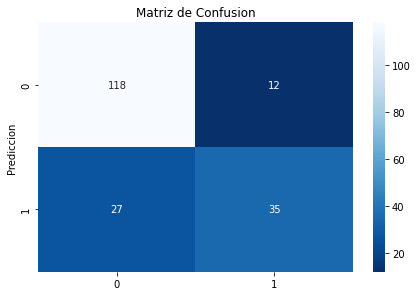

In [ ]:
import numpy as np
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks=np.arange(len(class_names))

plt.xticks(tick_marks, class_names)
plt.xticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues_r', fmt='g')

ax.xaxis.set_label_position('top')
plt.tight_layout()

plt.title('Matriz de Confusion', y=1.1)
plt.ylabel('Actual')
plt.ylabel('Prediccion')
